## Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=170)
np.set_printoptions(suppress=True)
np.random.seed(8)

import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep
sleep(0.2)

C:\Users\raziel lab\AppData\Local\Temp\ipykernel_40440\4262382925.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Imports & Parameters

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set(style="darkgrid")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
random_state = 8

## Loading the data

In [3]:
direct_consumption_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/direct_consumption_df.csv')
print(direct_consumption_df.shape)
direct_consumption_df.head()

(47, 25)


,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Building 14,32322.67,20597.35,19120.75,12793.32,15889.49,19220.65,21234.02,15783.52,16713.58,13395.52,15324.38,18731.01,21346.58,18317.78,12132.83,7308.02,11366.84,13582.40,13594.38,13306.80,12334.07,10899.14,8913.22,10216.24
1,Building 15-16,80986.07,68354.88,79253.44,71262.98,78553.85,80835.15,78680.25,74845.36,74679.36,72665.16,75472.21,84106.24,84428.05,72613.89,56865.91,41954.40,56673.32,60357.77,56887.93,64589.00,68955.00,61578.00,63558.00,58956.93
2,Building 17,17116.72,13160.29,14924.58,12083.06,10763.36,9963.47,10674.28,9750.88,10825.56,9763.25,10313.20,14048.81,15075.77,12487.45,8015.50,4239.81,9064.81,9694.54,9478.95,9161.28,8544.02,8701.60,8534.39,9705.37
3,Building 18,34066.53,25909.36,19466.09,15055.70,17135.52,17391.83,18756.38,18569.44,16230.71,16298.52,16068.00,20430.97,29965.05,22239.80,12466.28,6382.53,13140.51,15736.39,15494.02,15187.64,14304.80,12376.80,13100.75,14605.35
4,Building 22,96588.84,86662.73,88725.18,74535.23,97250.64,100709.34,106762.79,77097.23,88570.44,93544.00,115000.00,97697.14,90948.81,82801.07,57805.84,24640.20,65340.03,72707.87,83257.36,86117.21,72422.59,72737.35,63616.19,69856.64


In [4]:
indirect_consumption_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/indirect_consumption_df.csv')
print(indirect_consumption_df.shape)
indirect_consumption_df.head()

(47, 25)


,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Building 14,15.383570,9.038097,530.725715,401.938734,9995.987708,16245.695145,17115.967612,17517.754382,15841.395696,5030.039440,5394.157564,576.675786,0.000000,0.000000,10.142588,0.000000,7800.773300,10166.364685,12292.240457,14276.140004,14864.476764,3233.091325,0.000000,0.000000
1,Building 15-16,10439.197466,11153.307076,21448.094471,12477.416862,37633.788551,52243.404076,52727.331228,59835.230968,47330.192173,25206.562429,18107.362067,11614.366103,7972.071796,11847.665189,19654.554833,2412.672135,23977.112734,26332.197570,40449.371638,40492.238103,38203.666427,25078.464713,12173.101033,9506.179567
2,Building 17,89.126211,36.861258,1618.455926,1150.290424,4649.029532,6094.030262,7961.918841,7159.526443,8941.583993,2084.016041,1480.758301,123.159890,0.000000,229.215242,621.948340,46.851270,3046.507182,3232.266357,11340.621268,5105.635651,3706.257476,2537.956861,506.068138,2.328811
3,Building 18,2292.411169,1631.027983,2255.569283,3930.985004,8203.516174,13403.740136,14978.148924,15811.166337,11848.774279,7962.037259,4447.665483,2771.511933,0.000000,115.942031,537.745979,375.069004,5965.522580,7453.819039,10630.348112,11105.031380,8554.012095,4774.738825,2801.571011,625.127744
4,Building 22,6928.762637,8614.582420,15711.349134,14100.583205,38769.964738,58714.033874,73362.230616,48608.052037,53645.578167,27310.936708,27913.686183,18757.005120,7279.137830,10090.959936,10216.917336,360.599468,27784.345312,34496.363432,56254.753525,50415.350298,43617.385986,23037.668555,11425.123867,514.897335


In [5]:
appliances_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/appliances_df.csv')
print(appliances_df.shape)
appliances_df.head()

(564, 15)


,month_number,building_number,c_desktop,c_laptop,c_server,r_domestic,r_industrial,r_other,f_industrial,f_domestic,cv_0,cv_1,cv_2,cv_3,cv_4
0,1,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,2,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,3,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,4,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,5,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [6]:
buildings_details_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/buildings_details_df.csv')
print(buildings_details_df.shape)
buildings_details_df.head()

(47, 5)


,building_number,area_sm,est_year,floors,elevators
0,Building 14,2953,2016,5,1
1,Building 15-16,6343,2003,5,2
2,Building 17,1580,2006,3,0
3,Building 18,1792,2006,3,0
4,Building 22,10061,1971,5,3


In [7]:
labels_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/labels_df.csv')
print(labels_df.shape)
labels_df.head()

(47, 2)


,building_number,label
0,Building 14,0
1,Building 15-16,0
2,Building 17,0
3,Building 18,0
4,Building 22,0


In [8]:
temperature_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/raw_data/temperature_data.csv')
temperature_df = temperature_df[temperature_df['Hour'] != 0]
temperature_df = temperature_df[temperature_df['Hour'] != 1]
temperature_df = temperature_df[temperature_df['Hour'] != 2]
temperature_df = temperature_df[temperature_df['Hour'] != 3]
temperature_df = temperature_df[temperature_df['Hour'] != 4]
temperature_df = temperature_df[temperature_df['Hour'] != 20]
temperature_df = temperature_df[temperature_df['Hour'] != 21]
temperature_df = temperature_df[temperature_df['Hour'] != 22]
temperature_df = temperature_df[temperature_df['Hour'] != 23]
print(temperature_df.shape)
temperature_df.head()

(5475, 5)


,Year,Month,Day,Hour,Temperature
5,2019,1,1,5,6.2
6,2019,1,1,6,6.9
7,2019,1,1,7,8.9
8,2019,1,1,8,11.5
9,2019,1,1,9,14.2


## Data Pre-Processing

### Explains Part

Division into groups according to year of establishment

In [9]:
#sorted(buildings_details_df.est_year.unique())

In [10]:
buildings_details_df['est_group'] = np.where((buildings_details_df.est_year <= 2010), 0, 0)
buildings_details_df['est_group'] = np.where((buildings_details_df.est_year >= 2013), 1, buildings_details_df['est_group'])

est_dummies = pd.get_dummies(data=buildings_details_df['est_group'], prefix='est', drop_first=True)
est_dummies.insert(0, 'building_number', buildings_details_df['building_number'])

buildings_details_df = pd.merge(buildings_details_df, est_dummies, how='inner', on='building_number')
buildings_details_df.drop(['est_year', 'est_group'], axis=1, inplace=True)
buildings_details_df.drop(['floors'], axis=1, inplace=True)
buildings_details_df.drop(['elevators'], axis=1, inplace=True)

area_sm_to_move = buildings_details_df.pop("area_sm")
buildings_details_df.insert(2, "area_sm", area_sm_to_move)

buildings_details_df['building_number'] = buildings_details_df['building_number'].str.replace('Building ','')

buildings_details_df.head()

,building_number,est_1,area_sm
0,14,1,2953
1,15-16,0,6343
2,17,0,1580
3,18,0,1792
4,22,0,10061


Merge Products with Buildings Details into one data frame

In [11]:
direct_model_19_df = pd.merge(appliances_df, buildings_details_df, how='inner', on='building_number')
direct_model_19_df.head()

,month_number,building_number,c_desktop,c_laptop,c_server,r_domestic,r_industrial,r_other,f_industrial,f_domestic,cv_0,cv_1,cv_2,cv_3,cv_4,est_1,area_sm
0,1,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2953
1,2,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2953
2,3,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2953
3,4,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2953
4,5,14,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,2953


### Explained Part

In [12]:
direct_consumption_df['building_number'] = direct_consumption_df['building_number'].str.replace('Building ','')
direct_consumption_df.head()

,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,14,32322.67,20597.35,19120.75,12793.32,15889.49,19220.65,21234.02,15783.52,16713.58,13395.52,15324.38,18731.01,21346.58,18317.78,12132.83,7308.02,11366.84,13582.40,13594.38,13306.80,12334.07,10899.14,8913.22,10216.24
1,15-16,80986.07,68354.88,79253.44,71262.98,78553.85,80835.15,78680.25,74845.36,74679.36,72665.16,75472.21,84106.24,84428.05,72613.89,56865.91,41954.40,56673.32,60357.77,56887.93,64589.00,68955.00,61578.00,63558.00,58956.93
2,17,17116.72,13160.29,14924.58,12083.06,10763.36,9963.47,10674.28,9750.88,10825.56,9763.25,10313.20,14048.81,15075.77,12487.45,8015.50,4239.81,9064.81,9694.54,9478.95,9161.28,8544.02,8701.60,8534.39,9705.37
3,18,34066.53,25909.36,19466.09,15055.70,17135.52,17391.83,18756.38,18569.44,16230.71,16298.52,16068.00,20430.97,29965.05,22239.80,12466.28,6382.53,13140.51,15736.39,15494.02,15187.64,14304.80,12376.80,13100.75,14605.35
4,22,96588.84,86662.73,88725.18,74535.23,97250.64,100709.34,106762.79,77097.23,88570.44,93544.00,115000.00,97697.14,90948.81,82801.07,57805.84,24640.20,65340.03,72707.87,83257.36,86117.21,72422.59,72737.35,63616.19,69856.64


In [13]:
indirect_consumption_df['building_number'] = indirect_consumption_df['building_number'].str.replace('Building ','')
indirect_consumption_df.head()

,building_number,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,14,15.383570,9.038097,530.725715,401.938734,9995.987708,16245.695145,17115.967612,17517.754382,15841.395696,5030.039440,5394.157564,576.675786,0.000000,0.000000,10.142588,0.000000,7800.773300,10166.364685,12292.240457,14276.140004,14864.476764,3233.091325,0.000000,0.000000
1,15-16,10439.197466,11153.307076,21448.094471,12477.416862,37633.788551,52243.404076,52727.331228,59835.230968,47330.192173,25206.562429,18107.362067,11614.366103,7972.071796,11847.665189,19654.554833,2412.672135,23977.112734,26332.197570,40449.371638,40492.238103,38203.666427,25078.464713,12173.101033,9506.179567
2,17,89.126211,36.861258,1618.455926,1150.290424,4649.029532,6094.030262,7961.918841,7159.526443,8941.583993,2084.016041,1480.758301,123.159890,0.000000,229.215242,621.948340,46.851270,3046.507182,3232.266357,11340.621268,5105.635651,3706.257476,2537.956861,506.068138,2.328811
3,18,2292.411169,1631.027983,2255.569283,3930.985004,8203.516174,13403.740136,14978.148924,15811.166337,11848.774279,7962.037259,4447.665483,2771.511933,0.000000,115.942031,537.745979,375.069004,5965.522580,7453.819039,10630.348112,11105.031380,8554.012095,4774.738825,2801.571011,625.127744
4,22,6928.762637,8614.582420,15711.349134,14100.583205,38769.964738,58714.033874,73362.230616,48608.052037,53645.578167,27310.936708,27913.686183,18757.005120,7279.137830,10090.959936,10216.917336,360.599468,27784.345312,34496.363432,56254.753525,50415.350298,43617.385986,23037.668555,11425.123867,514.897335


Changing months names to numbers

In [14]:
direct_consumption_19_df = direct_consumption_df.filter(regex='19')
direct_consumption_19_df.columns = [str(x) for x in range(1,13)]
direct_consumption_19_df.insert(0, 'building_number', direct_consumption_df['building_number'])

indirect_consumption_19_df = indirect_consumption_df.filter(regex='19')
indirect_consumption_19_df.columns = [str(x) for x in range(1,13)]
indirect_consumption_19_df.insert(0, 'building_number', indirect_consumption_df['building_number'])

Transformation

In [15]:
adjusted_consumption = direct_model_19_df.iloc[:,:2]
adjusted_consumption['direct_consumption'] = 0
adjusted_consumption['indirect_consumption'] = 0
adjusted_consumption.drop(adjusted_consumption.index, axis = 0, inplace=True)

In [16]:
for i in range(len(direct_consumption_19_df['building_number'])):
    for j in range(1, 13):
        adjusted_consumption = adjusted_consumption.append({'month_number':str(j),
                                                  'building_number':direct_consumption_19_df['building_number'].iloc[i],
                                                  'direct_consumption':direct_consumption_19_df.iloc[i,j],
                                                  'indirect_consumption':indirect_consumption_19_df.iloc[i,j]}, ignore_index=True)
adjusted_consumption.head()

,month_number,building_number,direct_consumption,indirect_consumption
0,1,14,32322.67,15.383570
1,2,14,20597.35,9.038097
2,3,14,19120.75,530.725715
3,4,14,12793.32,401.938734
4,5,14,15889.49,9995.987708


Merge Explained df with Explains df

In [17]:
direct_model_19_df['month_number'] = direct_model_19_df['month_number'].astype(str)
direct_model_19_df = pd.merge(direct_model_19_df, adjusted_consumption,  how='right',  left_on=['month_number','building_number'], right_on = ['month_number','building_number'])

Calculate the Average Temperature for each month

In [18]:
avg_temperature_df = pd.DataFrame(columns = ['month_number','avg_temperature'])
for i in range(1,13):
    avg_temperature_df = avg_temperature_df.append({'month_number':str(i),
                                                    'avg_temperature':temperature_df.loc[temperature_df['Month'] == i, 'Temperature'].mean()},
                                                    ignore_index=True)
avg_temperature_df

,month_number,avg_temperature
0,1,12.887957
1,2,14.199048
2,3,15.978925
3,4,20.036000
4,5,27.699140
5,6,30.152444
6,7,31.037419
7,8,31.056344
8,9,28.788667
9,10,26.078065


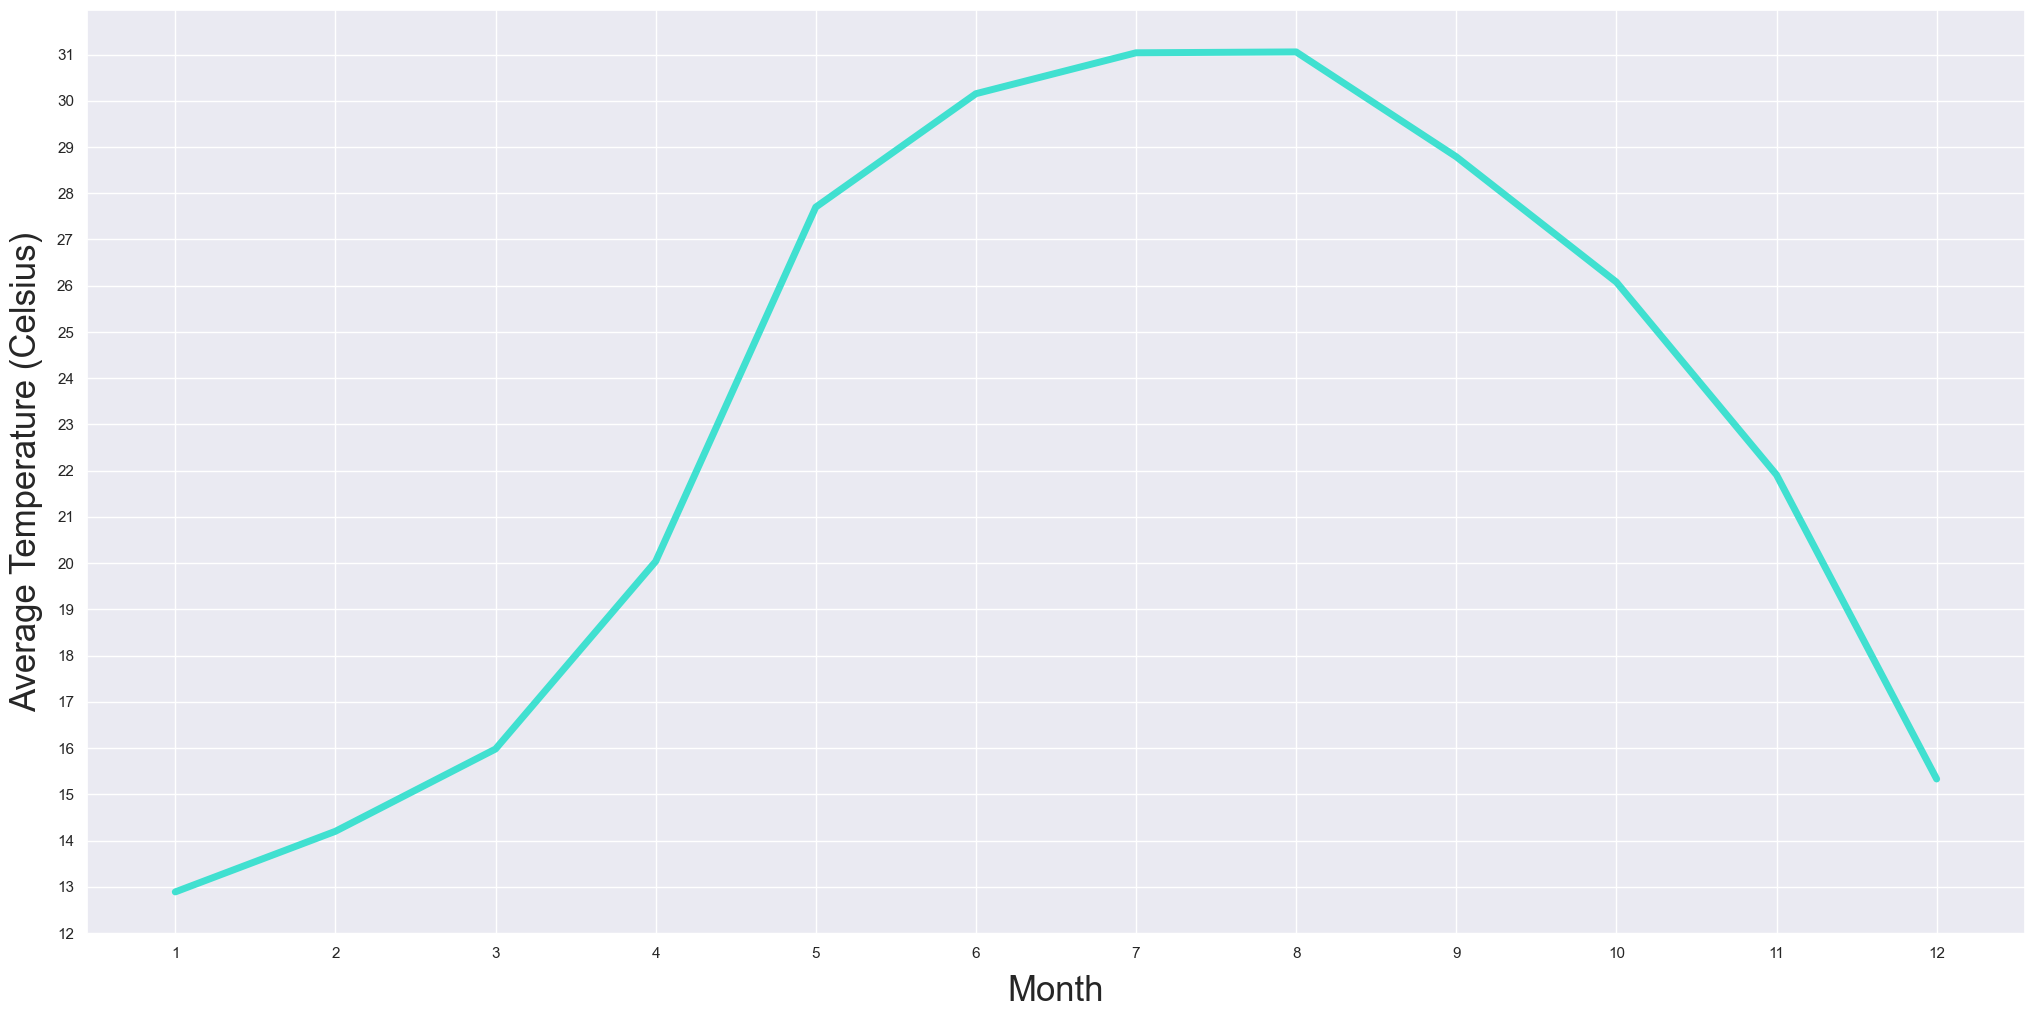

In [19]:
plt.figure(figsize=(25,12))

plt.xlabel("Month", fontsize=25, labelpad=10)
plt.ylabel("Average Temperature (Celsius)", fontsize=25, labelpad=10)

plt.yticks(np.arange(0, 32, step=1))

# graph_title = "Average Temperature - 2019"
# plt.title(graph_title, fontsize=25, pad=10)

plt.plot(avg_temperature_df['month_number'], avg_temperature_df['avg_temperature'], linewidth=5, color='turquoise')

plt.show()

In [20]:
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '1'] = abs(avg_temperature_df['avg_temperature']-23)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '2'] = abs(avg_temperature_df['avg_temperature']-23)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '3'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '4'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '5'] = abs(avg_temperature_df['avg_temperature']-23)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '6'] = abs(avg_temperature_df['avg_temperature']-23)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '7'] = abs(avg_temperature_df['avg_temperature']-23)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '8'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '9'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '10'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '11'] = abs(avg_temperature_df['avg_temperature']-24)
avg_temperature_df['avg_temperature'][avg_temperature_df['month_number'] == '12'] = abs(avg_temperature_df['avg_temperature']-23)
    
avg_temperature_df.rename(columns = {'avg_temperature':'delta_temperature'}, inplace = True)
avg_temperature_df.to_csv('delta_temperature_df.csv', index=False, encoding="utf-8-sig")
avg_temperature_df

,month_number,delta_temperature
0,1,10.112043
1,2,8.800952
2,3,8.021075
3,4,3.964000
4,5,4.699140
5,6,7.152444
6,7,8.037419
7,8,7.056344
8,9,4.788667
9,10,2.078065


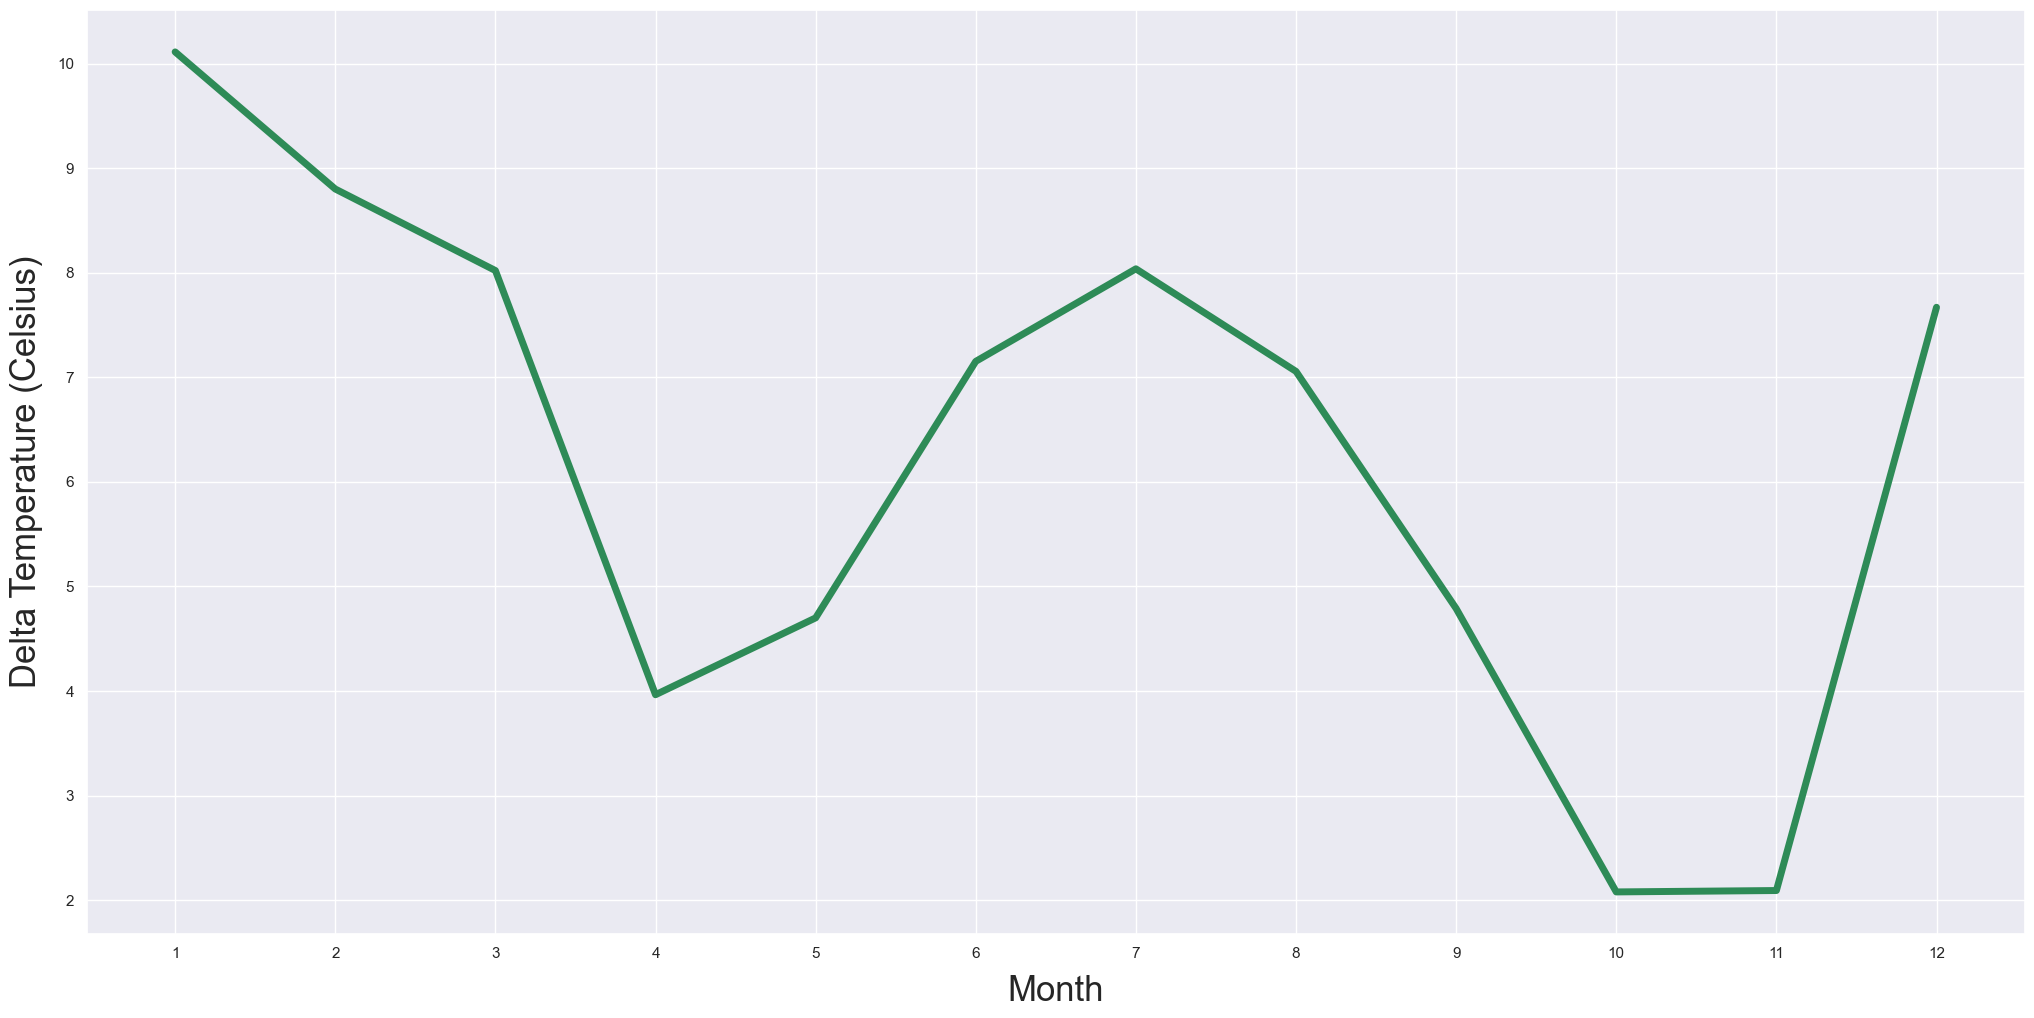

In [21]:
plt.figure(figsize=(25,12))

plt.xlabel("Month", fontsize=25, labelpad=10)
plt.ylabel("Delta Temperature (Celsius)", fontsize=25, labelpad=10)

plt.yticks(np.arange(0, 12, step=1))

# graph_title = "Delta Temperature - 2019"
# plt.title(graph_title, fontsize=25, pad=10)

plt.plot(avg_temperature_df['month_number'], avg_temperature_df['delta_temperature'], linewidth=5, color='seagreen')

plt.show()

Changing months numbers to Delta Temperature

In [22]:
direct_model_19_df = pd.merge(direct_model_19_df, avg_temperature_df, how='outer', on='month_number')
direct_model_19_df.insert(15, 'delta_temperature', direct_model_19_df.pop('delta_temperature'))
direct_model_19_df['delta_temperature'] = direct_model_19_df['delta_temperature'].astype(np.float)
direct_model_19_df.drop(['month_number'], axis=1, inplace=True)

In [23]:
direct_model_19_df['building_number']= direct_model_19_df['building_number'].astype(str)

Division into Laboratory Buildings and Non Laboratory Buildings

In [24]:
labels_df.rename(columns = {'Building':'building_number'}, inplace = True)
labels_df['building_number'] = labels_df['building_number'].str.replace('Building ','')

direct_model_19_df = pd.merge(direct_model_19_df, labels_df, how='inner', on='building_number')
direct_model_19_df.insert(1, 'label', direct_model_19_df.pop('label'))

direct_model_19_df.rename(columns = {'label':'lab'}, inplace = True)

In [25]:
direct_model_19_df.to_csv('direct_model_19_df.csv', index=False, encoding="utf-8-sig")

In [26]:
direct_model_19_df

,building_number,lab,c_desktop,c_laptop,c_server,r_domestic,r_industrial,r_other,f_industrial,f_domestic,cv_0,cv_1,cv_2,cv_3,cv_4,delta_temperature,est_1,area_sm,direct_consumption,indirect_consumption
0,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,10.112043,1,2953,32322.67,15.383570
1,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.800952,1,2953,20597.35,9.038097
2,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.021075,1,2953,19120.75,530.725715
3,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,3.964000,1,2953,12793.32,401.938734
4,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4.699140,1,2953,15889.49,9995.987708
5,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,7.152444,1,2953,19220.65,16245.695145
6,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.037419,1,2953,21234.02,17115.967612
7,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,7.056344,1,2953,15783.52,17517.754382
8,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4.788667,1,2953,16713.58,15841.395696
9,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2.078065,1,2953,13395.52,5030.039440


# Direct Consumption

In [27]:
direct_lmm_model_19_df = pd.read_csv('direct_model_19_df.csv')

In [28]:
direct_lmm_model_19_df.insert(10, 'cv', direct_lmm_model_19_df['cv_0'] + direct_lmm_model_19_df['cv_1'] + direct_lmm_model_19_df['cv_2'] + direct_lmm_model_19_df['cv_3'] + direct_lmm_model_19_df['cv_4'])
direct_lmm_model_19_df.drop(['cv_0','cv_1','cv_2','cv_3','cv_4'], axis = 1, inplace = True)

direct_lmm_model_19_df.insert(2, 'labs_c_desktop', abs(direct_lmm_model_19_df['c_desktop'] * direct_lmm_model_19_df['lab']))
direct_lmm_model_19_df.insert(3, 'non_labs_c_desktop', abs(direct_lmm_model_19_df['c_desktop'] * (direct_lmm_model_19_df['lab']-1)))
direct_lmm_model_19_df.drop(['c_desktop'], axis = 1, inplace = True)

direct_lmm_model_19_df.insert(12, 'labs_delta_temperature_area', abs(direct_lmm_model_19_df['delta_temperature'] * direct_lmm_model_19_df['lab'] * direct_lmm_model_19_df['area_sm']))
direct_lmm_model_19_df.insert(13, 'non_labs_delta_temperature_area', abs(direct_lmm_model_19_df['delta_temperature'] * (direct_lmm_model_19_df['lab']-1) * direct_lmm_model_19_df['area_sm']))

direct_lmm_model_19_df.insert(9, 'wet_lab_instruments', direct_lmm_model_19_df['cv'] + direct_lmm_model_19_df['r_industrial'] + direct_lmm_model_19_df['r_other'] + direct_lmm_model_19_df['f_domestic'] + direct_lmm_model_19_df['f_industrial'])
direct_lmm_model_19_df.drop(['cv', 'r_industrial', 'r_other', 'f_domestic', 'f_industrial'], axis = 1, inplace = True)

direct_lmm_model_19_df.drop(['c_laptop'], axis = 1, inplace = True)
direct_lmm_model_19_df.drop(['r_domestic'], axis = 1, inplace = True)
direct_lmm_model_19_df.drop(['est_1'], axis = 1, inplace = True)

direct_lmm_model_19_df.to_csv('direct_lmm_model_19_df.csv', index=False, encoding="utf-8-sig")
direct_lmm_model_19_df.drop(['delta_temperature'], axis = 1, inplace = True)
direct_lmm_model_19_df.drop(['lab'], axis = 1, inplace = True)
direct_lmm_model_19_df.drop(['indirect_consumption'], axis = 1, inplace = True)
direct_lmm_model_19_df.head()

,building_number,labs_c_desktop,non_labs_c_desktop,c_server,wet_lab_instruments,labs_delta_temperature_area,non_labs_delta_temperature_area,area_sm,direct_consumption
0,14,0,13,0.0,0.0,0.0,29860.863011,2953,32322.67
1,14,0,13,0.0,0.0,0.0,25989.212381,2953,20597.35
2,14,0,13,0.0,0.0,0.0,23686.235269,2953,19120.75
3,14,0,13,0.0,0.0,0.0,11705.692000,2953,12793.32
4,14,0,13,0.0,0.0,0.0,13876.559785,2953,15889.49


### Removing Exceptions

In [29]:
direct_lmm_model_19_df = direct_lmm_model_19_df[direct_lmm_model_19_df['building_number'] != '95']
direct_lmm_model_19_df = direct_lmm_model_19_df[direct_lmm_model_19_df['building_number'] != '51']
direct_lmm_model_19_df = direct_lmm_model_19_df[direct_lmm_model_19_df['building_number'] != '70']

In [30]:
direct_lmm_model_19_df.shape

(528, 9)

## LMM - Direct Consumption

### Stepwise for LMM Model

In [31]:
def stepwise_selection_lmm(X, y, x_group, threshold_in=0.05, threshold_out=0.1, verbose=True):
    
    initial_list=[]
    included = list(initial_list)
    
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.MixedLM(y, sm.add_constant(pd.DataFrame(X[included+[new_column]])), groups=x_group).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        model = sm.MixedLM(y, sm.add_constant(pd.DataFrame(X[included])), groups=x_group).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

### Create Model

In [32]:
x_group = direct_lmm_model_19_df['building_number']
X = direct_lmm_model_19_df.drop(['building_number','direct_consumption'], axis=1, inplace=False)
y = direct_lmm_model_19_df['direct_consumption']

result = stepwise_selection_lmm(X, y, x_group)

print('resulting features:')
print(result)

Add  non_labs_delta_temperature_area with p-value 4.59129e-13
Add  area_sm                        with p-value 1.41997e-08
Add  labs_delta_temperature_area    with p-value 3.74273e-08
Add  c_server                       with p-value 2.4301e-06
Add  wet_lab_instruments            with p-value 3.48185e-05
Add  labs_c_desktop                 with p-value 0.0421585
Add  non_labs_c_desktop             with p-value 0.0396541
resulting features:
['non_labs_delta_temperature_area', 'area_sm', 'labs_delta_temperature_area', 'c_server', 'wet_lab_instruments', 'labs_c_desktop', 'non_labs_c_desktop']


In [33]:
direct_lmm_model = sm.MixedLM(y, sm.add_constant(pd.DataFrame(X[result])), groups=x_group)
direct_lmm_model_f = direct_lmm_model.fit()
print(direct_lmm_model_f.summary())

                         Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        direct_consumption
No. Observations:          528            Method:                    REML              
No. Groups:                44             Scale:                     47802136.4072     
Min. group size:           12             Log-Likelihood:            -5491.8654        
Max. group size:           12             Converged:                 Yes               
Mean group size:           12.0                                                        
---------------------------------------------------------------------------------------
                                    Coef.      Std.Err.   z   P>|z|   [0.025    0.975] 
---------------------------------------------------------------------------------------
const                                3182.637  5407.207 0.589 0.556 -7415.294 13780.567
non_labs_delta_temperature_area         0.243     0.032 7

In [34]:
AIC = (2 * len(direct_lmm_model_f.params)) - (2 * direct_lmm_model_f.llf)
BIC = (len(direct_lmm_model_f.params) * np.log(len(X))) - (2 * direct_lmm_model_f.llf)
SSE = sum(direct_lmm_model_f.resid ** 2)
MSE = SSE / (len(X) - len(direct_lmm_model_f.params))


var_f = direct_lmm_model_f.fittedvalues.var()
var_r = direct_lmm_model_f.cov_re.iloc[0][0]
var_e = direct_lmm_model_f.scale
R_2_marginal = var_f / (var_f + var_r + var_e)
R_2_conditional = (var_f + var_r) / (var_f + var_r + var_e)

print("AIC: ", AIC)
print("BIC: ", BIC)
print()
print("MSE: ", MSE)
print()
print("R^2 Marginal: ", R_2_marginal)
print("R^2 Conditional: ", R_2_conditional)

AIC:  11001.730744153254
BIC:  11040.152610706611

MSE:  44384285.17475832

R^2 Marginal:  0.7670235848761426
R^2 Conditional:  0.9757784683010138


In [35]:
direct_lmm_model_f.params.to_csv('direct_model_params.csv', index=True, encoding="utf-8-sig")

### Graphs

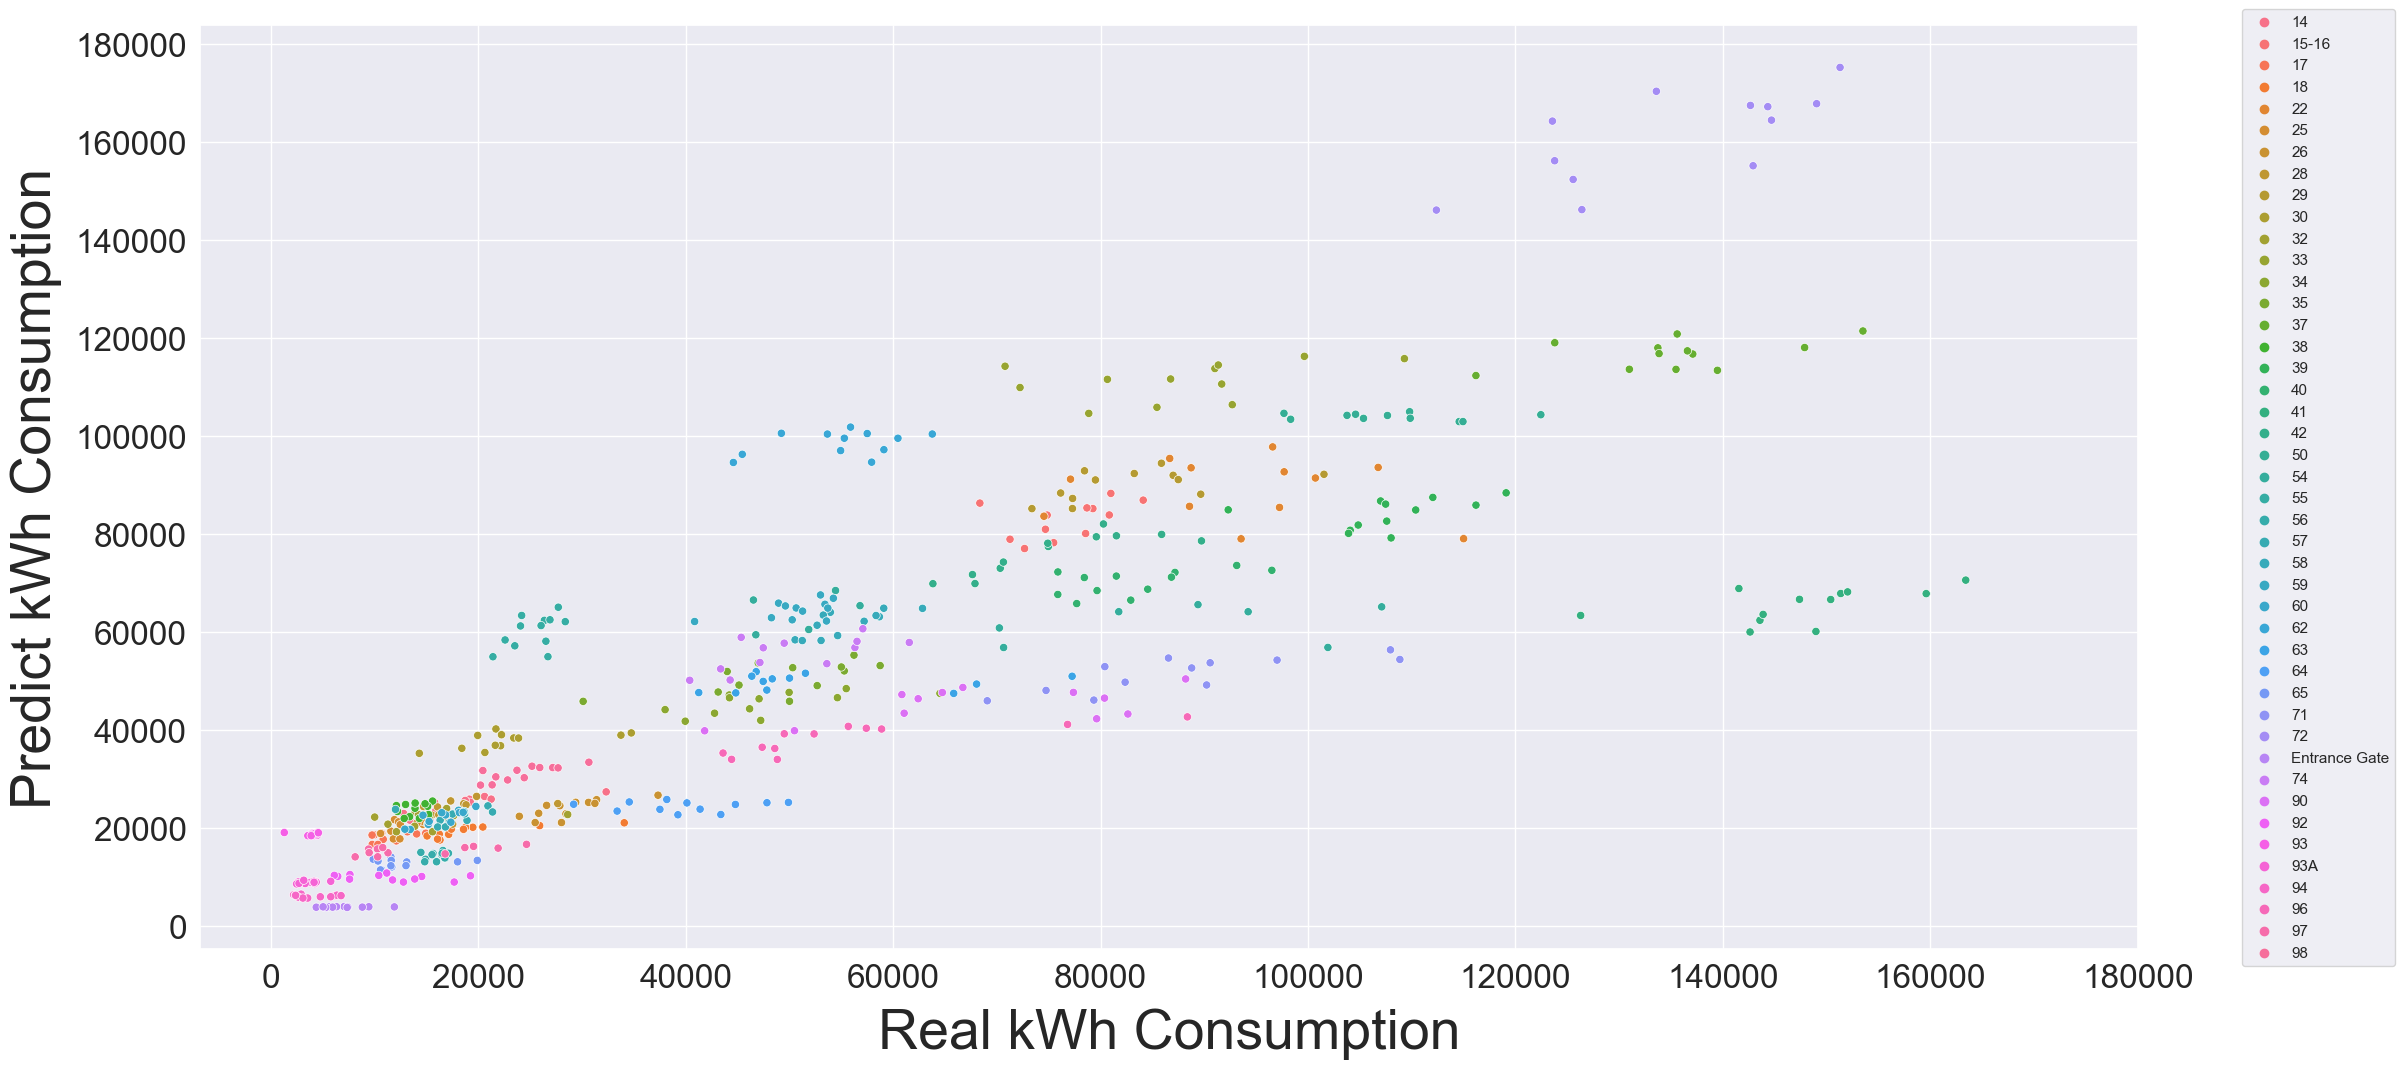

In [36]:
plt.figure(figsize=(25,12))

sns.scatterplot(data = direct_lmm_model_19_df, x=y, y=direct_lmm_model_f.predict(), hue = 'building_number')

plt.xlabel("Real kWh Consumption", fontsize=40, labelpad=10)
plt.ylabel("Predict kWh Consumption", fontsize=40, labelpad=10)

# graph_title = "QQ plot - Direct Consumption - 2019"
# plt.title(graph_title, fontsize=50, pad=10)

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.xticks(np.arange(0, 200000 , step=20000), fontsize=24)
plt.yticks(np.arange(0, 200000 , step=20000), fontsize=24)

plt.savefig("QQ plot - Direct Consumption (scatterplot) - 2019")
plt.show()

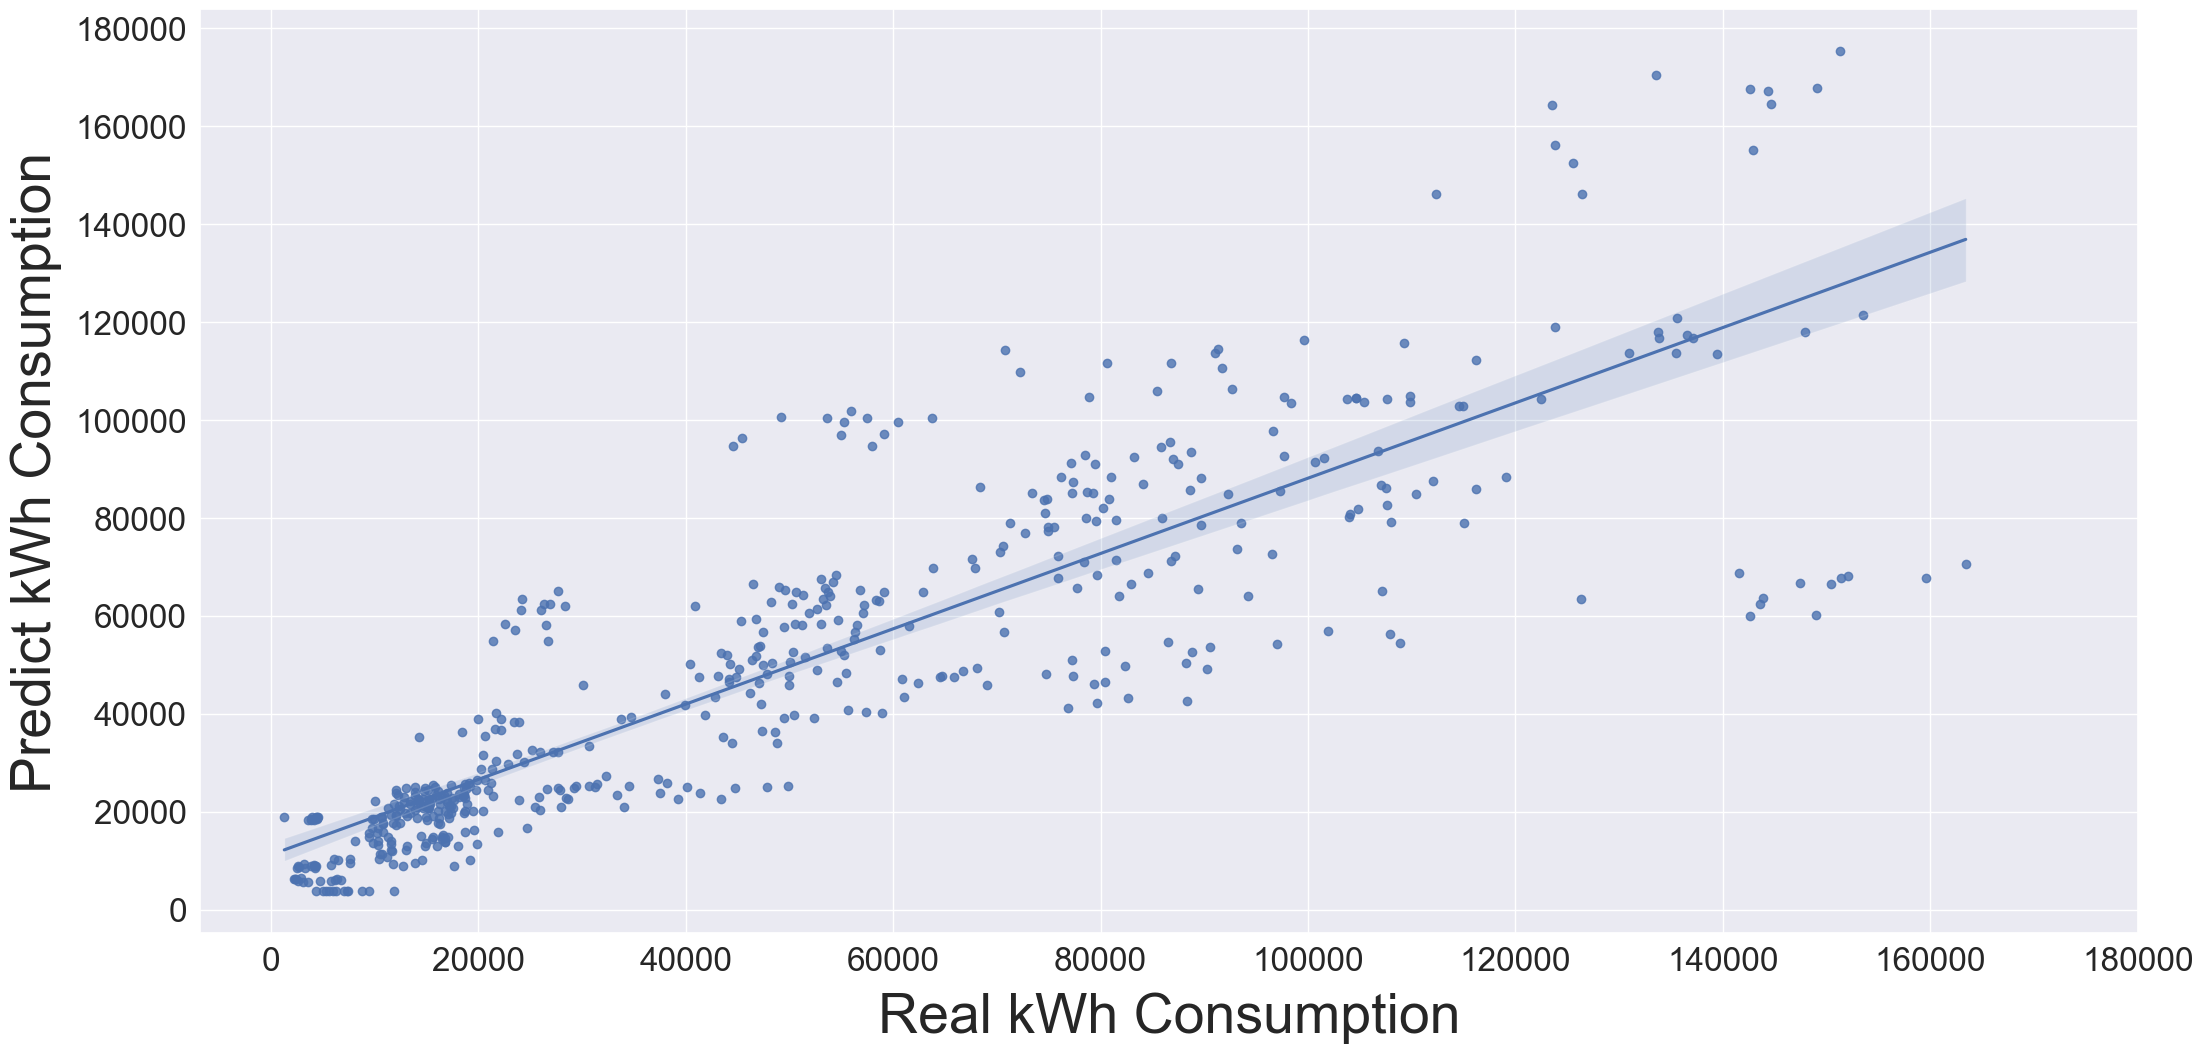

In [37]:
plt.figure(figsize=(25,12))

sns.regplot(x=y, y=direct_lmm_model_f.predict())

plt.xlabel("Real kWh Consumption", fontsize=40, labelpad=10)
plt.ylabel("Predict kWh Consumption", fontsize=40, labelpad=10)

# graph_title = "QQ plot - Direct Consumption - 2019"
# plt.title(graph_title, fontsize=50, pad=10)

plt.xticks(np.arange(0, 200000 , step=20000), fontsize=24)
plt.yticks(np.arange(0, 200000 , step=20000), fontsize=24)

plt.savefig("QQ plot - Direct Consumption (regplot) - 2019")
plt.show()

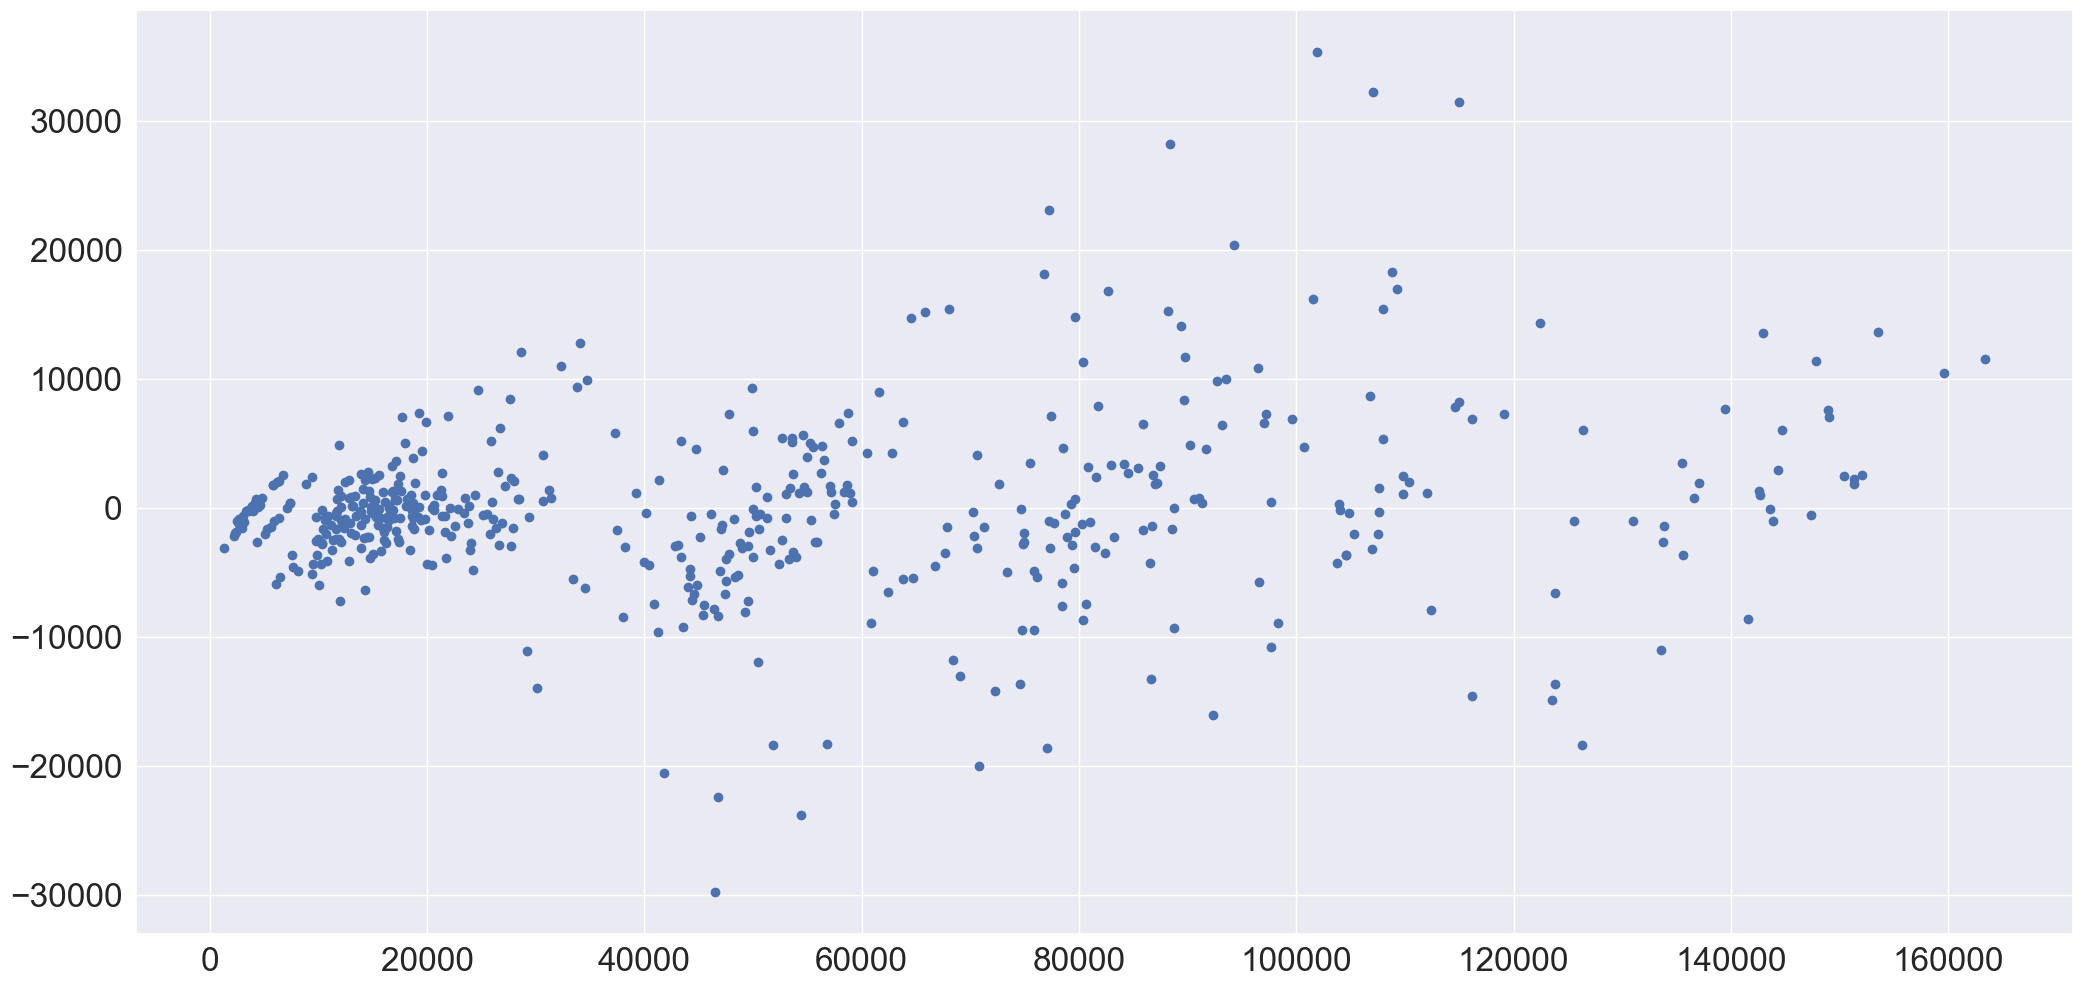

In [38]:
plt.figure(figsize=(25,12))

plt.scatter(y, direct_lmm_model_f.resid)

# graph_title = "Residuals - Direct Consumption - 2019"
# plt.title(graph_title, fontsize=50, pad=10)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig("Residuals - Direct Consumption - 2019")
plt.show()

## OLS - Direct Consumption

In [39]:
direct_ols_model_19_df = pd.read_csv('direct_model_19_df.csv')

In [40]:
direct_ols_model_19_df = direct_ols_model_19_df[direct_ols_model_19_df['building_number'] != '95']
direct_ols_model_19_df = direct_ols_model_19_df[direct_ols_model_19_df['building_number'] != '51']
direct_ols_model_19_df = direct_ols_model_19_df[direct_ols_model_19_df['building_number'] != '70']

### Stepwise for OLS Model

In [41]:
def stepwise_selection_ols(X, y, threshold_in=0.1, threshold_out=0.15, verbose=True):
    
    initial_list=[]
    included = list(initial_list)
    
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

### Create Model

In [42]:
direct_ols_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[result])))
direct_ols_model_f = direct_ols_model.fit()
print(direct_ols_model_f.summary())

                            OLS Regression Results                            
Dep. Variable:     direct_consumption   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     245.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          3.87e-160
Time:                        20:20:06   Log-Likelihood:                -5952.8
No. Observations:                 528   AIC:                         1.192e+04
Df Residuals:                     520   BIC:                         1.196e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
AIC = (2 * len(direct_ols_model_f.params)) - (2 * direct_ols_model_f.llf)
BIC = (len(direct_ols_model_f.params) * np.log(len(X))) - (2 * direct_ols_model_f.llf)
SSE = sum(direct_ols_model_f.resid ** 2)
MSE = SSE / (len(X) - len(direct_ols_model_f.params))

print("AIC: ", AIC)
print("BIC: ", BIC)
print()
print("MSE: ", MSE)

AIC:  11921.654968205848
BIC:  11955.807738475498

MSE:  368879046.37045723


### Graphs

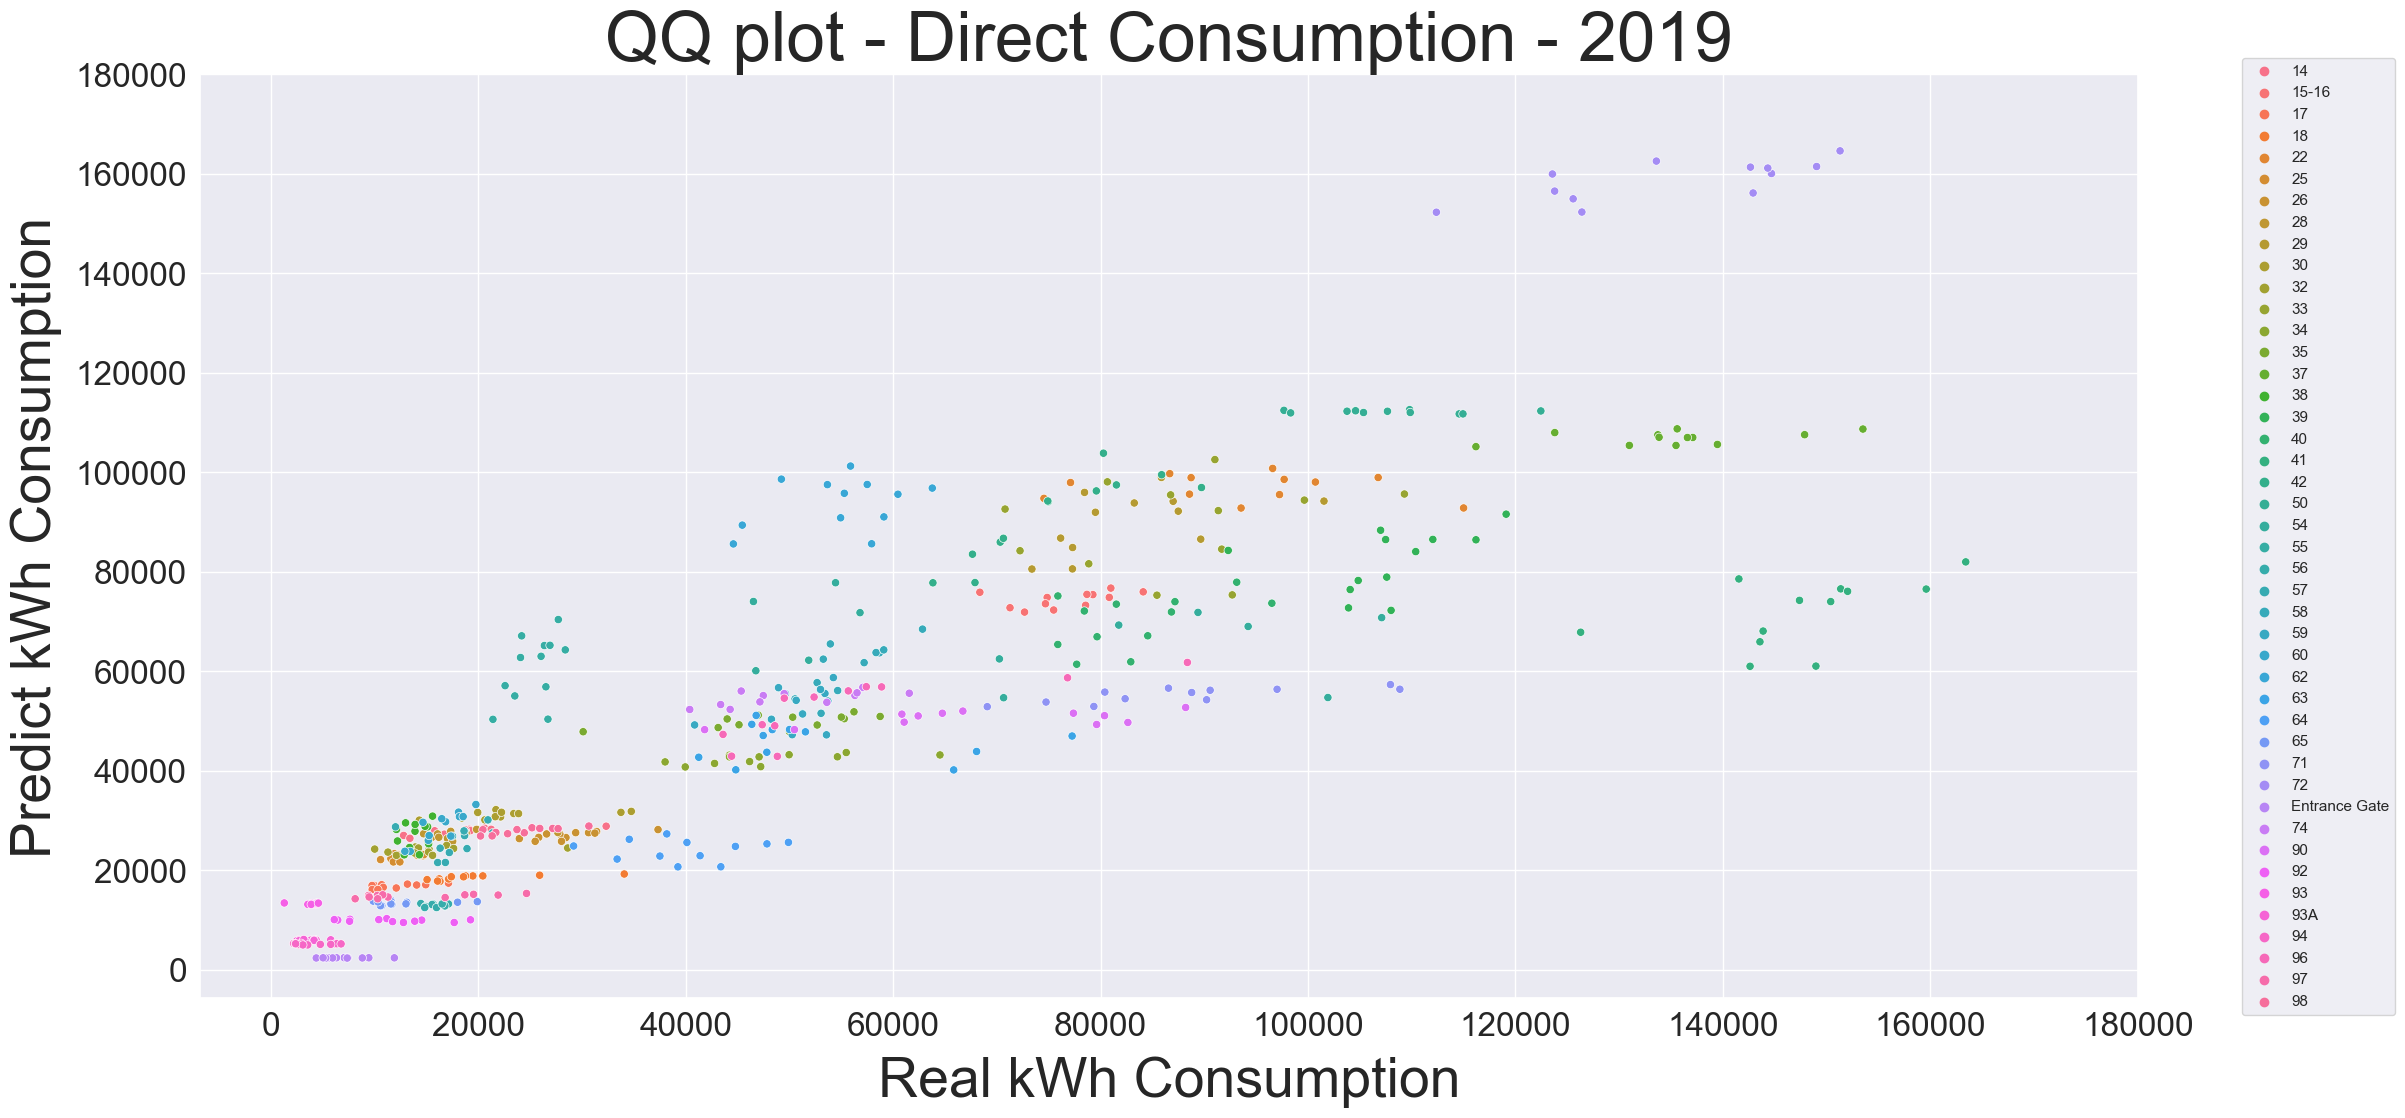

In [44]:
plt.figure(figsize=(25,12))

sns.scatterplot(data = direct_ols_model_19_df, x=y, y=direct_ols_model_f.predict(), hue = 'building_number')

plt.xlabel("Real kWh Consumption", fontsize=40, labelpad=10)
plt.ylabel("Predict kWh Consumption", fontsize=40, labelpad=10)

graph_title = "QQ plot - Direct Consumption - 2019"
plt.title(graph_title, fontsize=50, pad=10)

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.xticks(np.arange(0, 200000 , step=20000), fontsize=24)
plt.yticks(np.arange(0, 200000 , step=20000), fontsize=24)

plt.show()

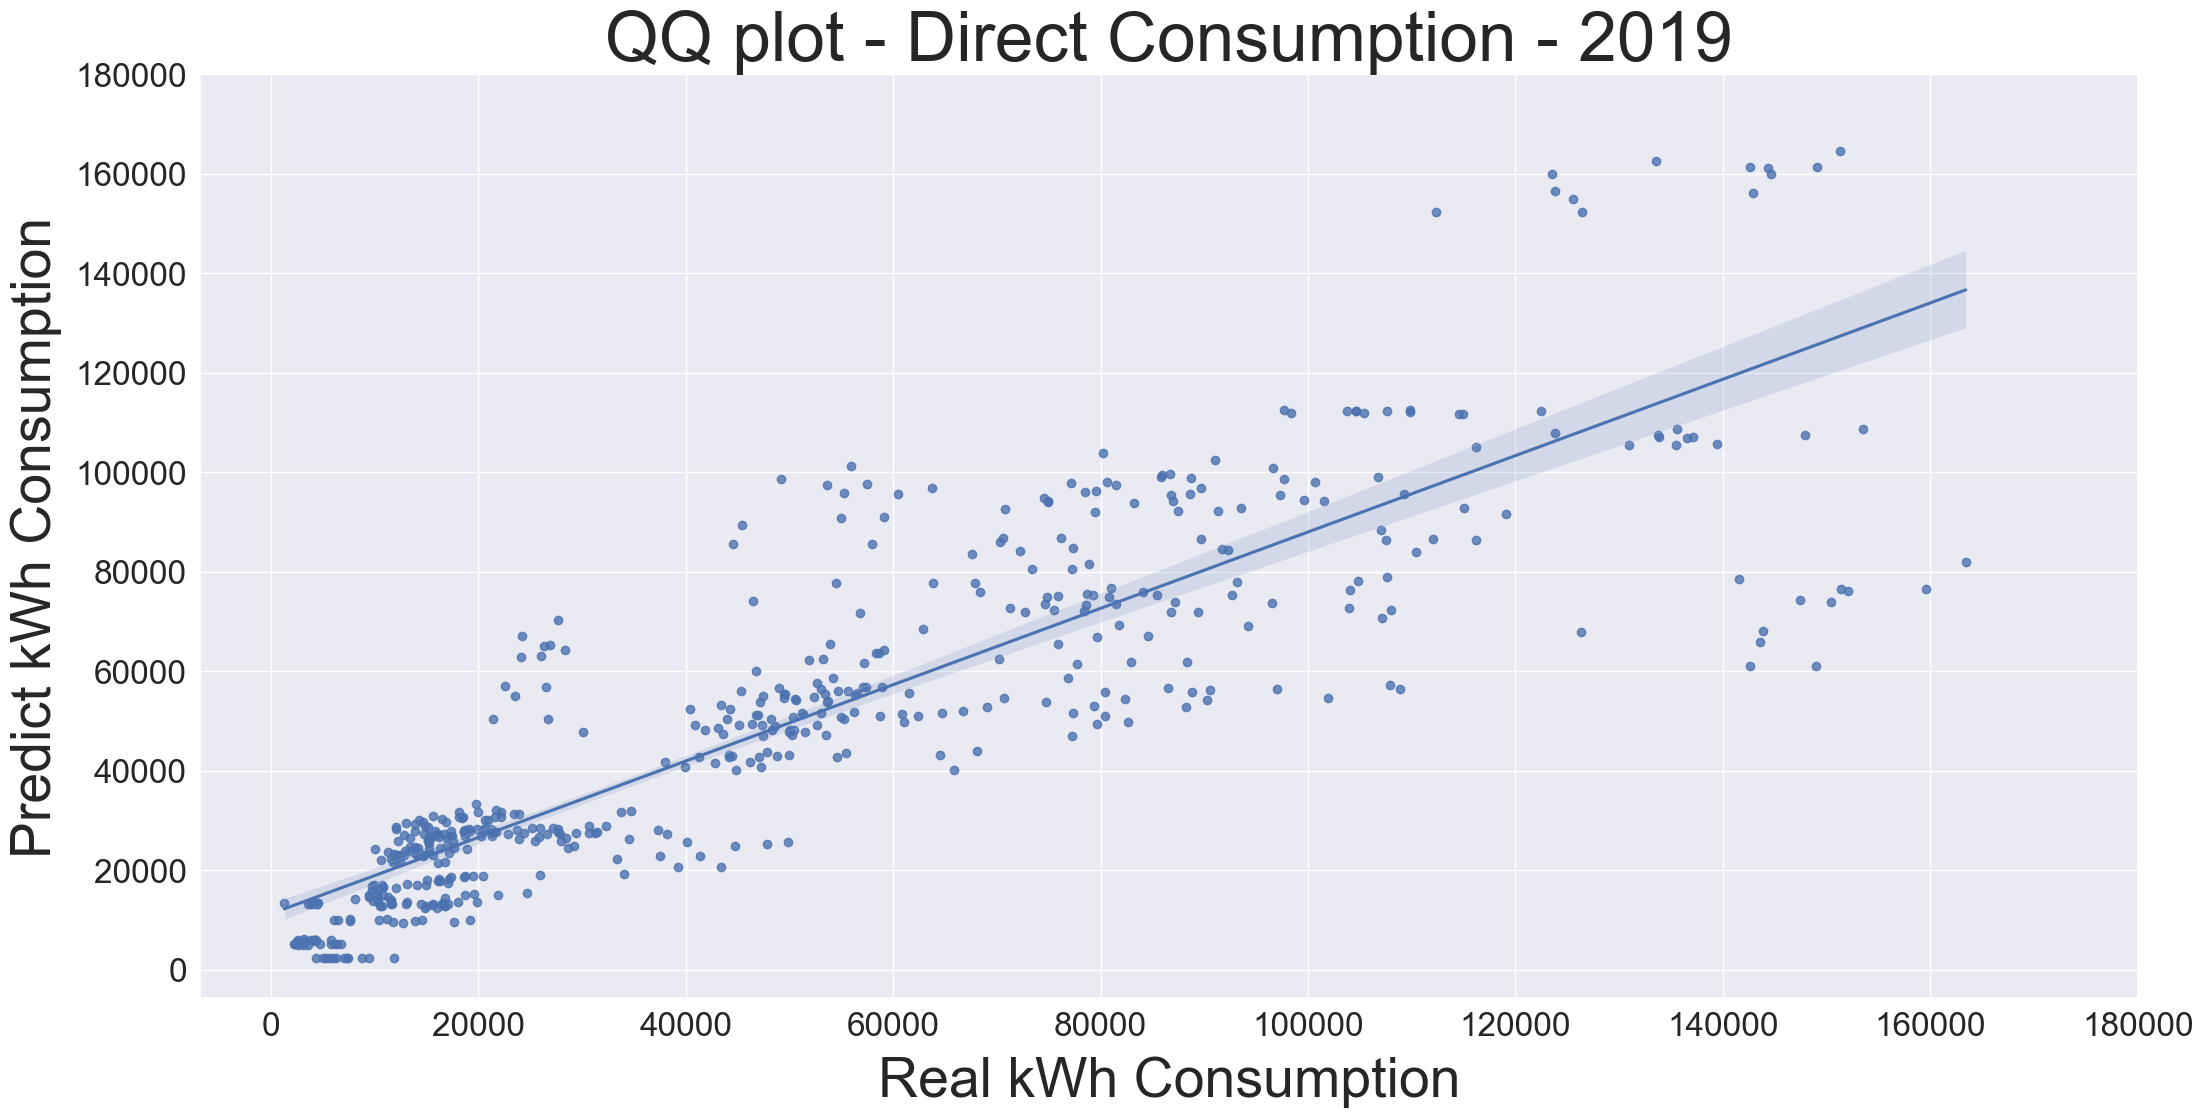

In [45]:
plt.figure(figsize=(25,12))

sns.regplot(x=y, y=direct_ols_model_f.predict())

plt.xlabel("Real kWh Consumption", fontsize=40, labelpad=10)
plt.ylabel("Predict kWh Consumption", fontsize=40, labelpad=10)

graph_title = "QQ plot - Direct Consumption - 2019"
plt.title(graph_title, fontsize=50, pad=10)

plt.xticks(np.arange(0, 200000 , step=20000), fontsize=24)
plt.yticks(np.arange(0, 200000 , step=20000), fontsize=24)

plt.show()

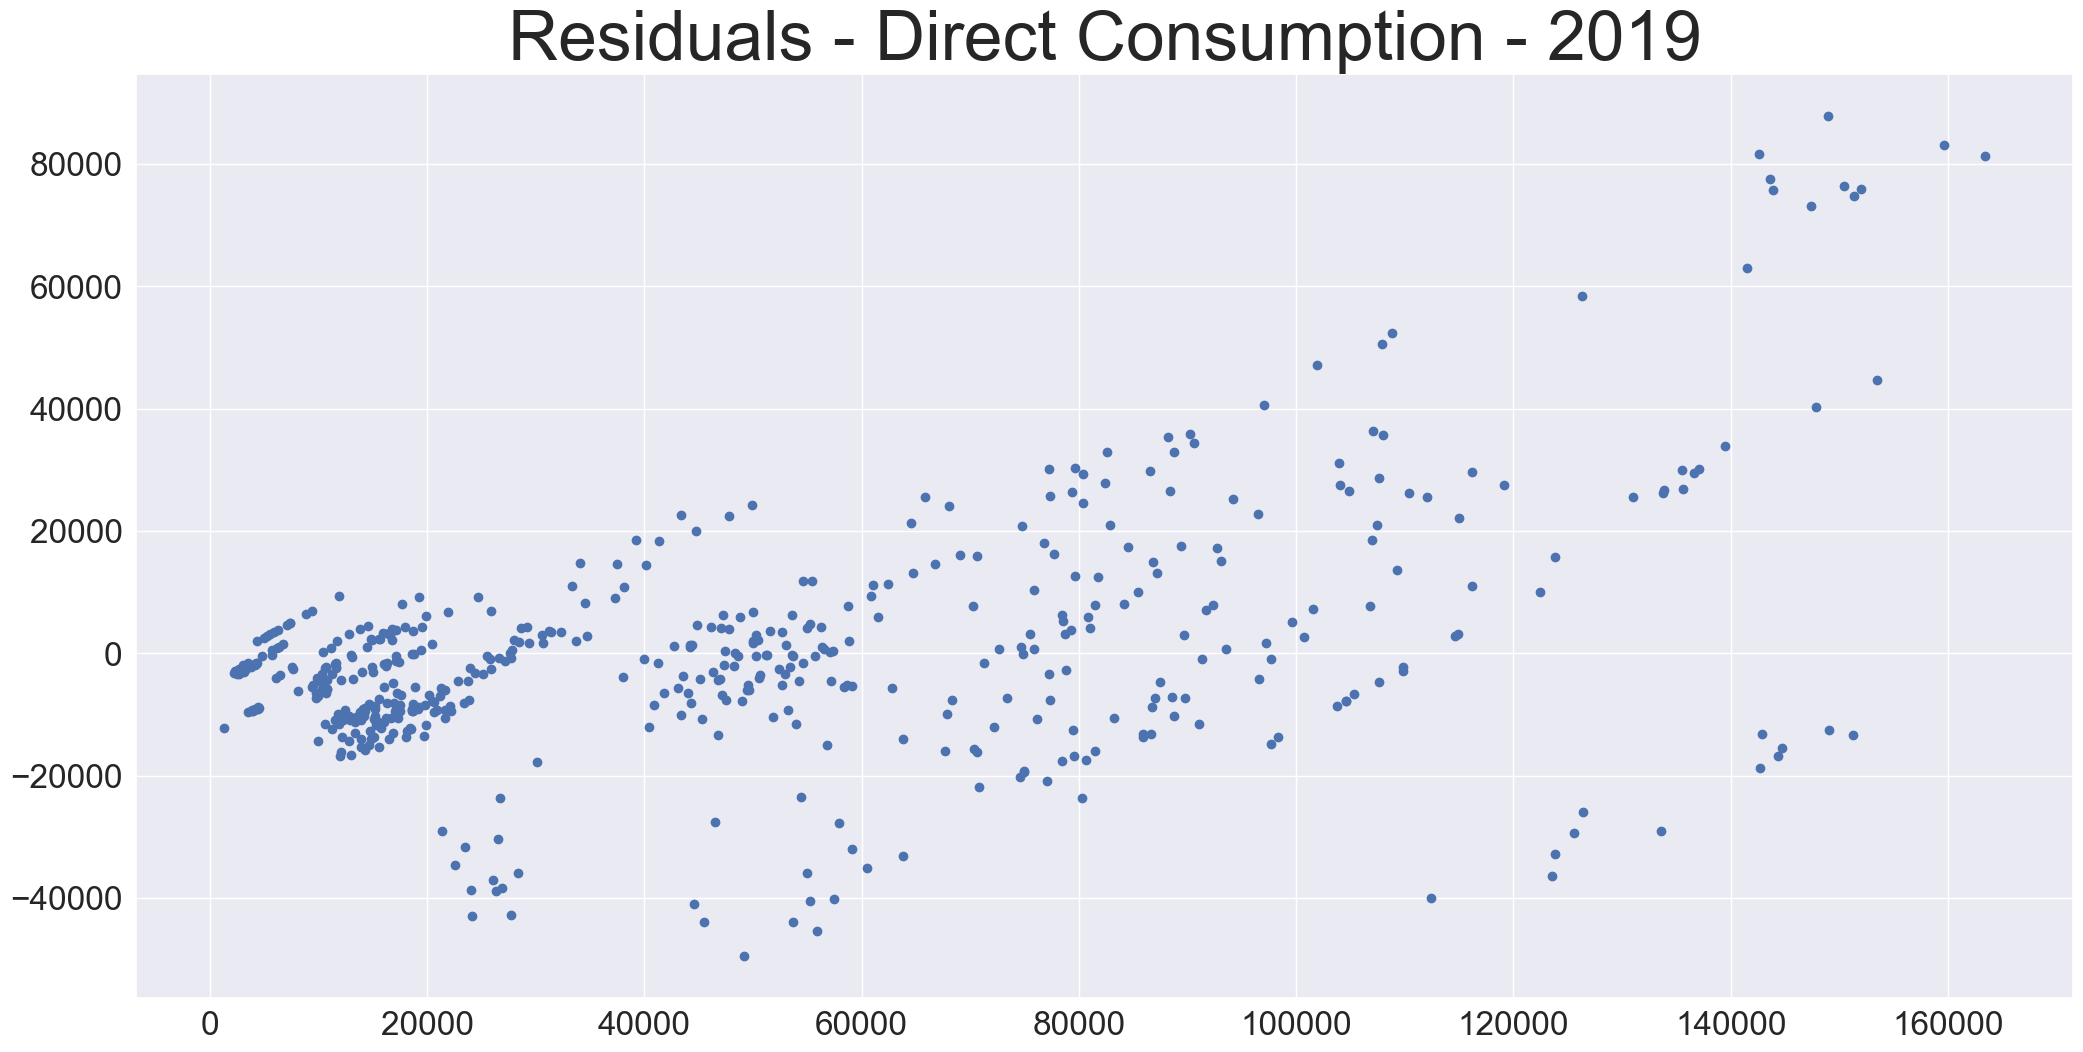

In [46]:
plt.figure(figsize=(25,12))

plt.scatter(y, direct_ols_model_f.resid)

graph_title = "Residuals - Direct Consumption - 2019"
plt.title(graph_title, fontsize=50, pad=10)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.show()